In [378]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as op
import math
from sklearn.preprocessing import PolynomialFeatures

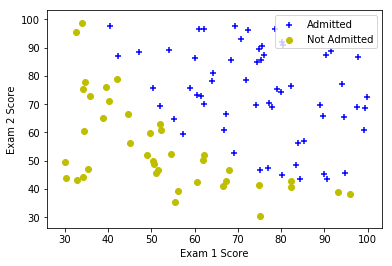

In [20]:
data=np.loadtxt("H://assignments//machine_learning//mex2//ex2data1.txt",delimiter=',')
x1_adm=data[:,0][data[:,2]==1]
x2_adm=data[:,1][data[:,2]==1]
x1_fa=data[:,0][data[:,2]==0]
x2_fa=data[:,1][data[:,2]==0]
a=plt.scatter(x1_adm,x2_adm,c='b',marker='+')
b=plt.scatter(x1_fa,x2_fa,c='y',marker='o')
plt.xlabel('Exam 1 Score')
plt.ylabel('Exam 2 Score')
plt.legend((a,b),('Admitted','Not Admitted'),loc=1)
plt.show()

In [36]:
plt.close('all')
# np.c_[np.ones((100, 1)),data[:,0],data[:,1]]


In [22]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [158]:
# sigmoid(np.array([0]))
# initializing variables
X=np.c_[data[:,0],data[:,1]]
y=np.c_[data[:,2]]
m, n = X.shape;
# Add intercept term to x and X_test
X = np.c_[np.ones((m, 1)),X];
# Initialize fitting parameters
initial_theta = np.zeros((n + 1, 1));
print(y.shape,X.shape,initial_theta.shape)

(100, 1) (100, 3) (3, 1)


In [173]:
def cost_logi(theta,X,y):
    theta = np.reshape(theta,(len(theta),1))
#     print('1',theta.shape)
    a=-np.dot(y.T,np.log(sigmoid(X.dot(theta))))
    b=-np.dot((1-y).T,np.log(1-sigmoid(X.dot(theta))))
    j=np.sum(a+b)/X.shape[0]
    return j
def grad_logi(theta,X,y):
    theta = np.reshape(theta,(len(theta),1))
#     print('2',theta.shape)
    grad=np.dot((sigmoid(X.dot(theta))-y).T,X)/X.shape[0]
    
    return grad.flatten()

In [174]:
cost=cost_logi(initial_theta,X,y)
grad=grad_logi(initial_theta,X,y)
cost,grad

(0.69314718055994518, array([ -0.1       , -12.00921659, -11.26284221]))

In [175]:
test_theta = np.array([[-24,0.2,0.2]]).T
cost=cost_logi(test_theta,X,y)
grad=grad_logi(test_theta,X,y)
cost,grad

(0.21833019382659771, array([ 0.04290299,  2.56623412,  2.64679737]))

In [190]:
initial_theta=np.zeros((n + 1))
Result = op.minimize(fun = cost_logi,  x0 = initial_theta, args = (X, y),method = 'TNC', jac = grad_logi);
opt_theta=Result.x

In [216]:
#predict
def predict(theta, X, threshold=0.5):
    p = sigmoid(X.dot(theta.T)) >= threshold
    return(p.astype('int'))

In [217]:
# Student with Exam 1 score 45 and Exam 2 score 85
# Predict using the optimized Theta values from above (res.x)
sigmoid(np.array([1, 45, 85]).dot(opt_theta.T))

0.77629062131640014

In [219]:
p = predict(opt_theta, X) 
print('Train accuracy {}%'.format(100*sum(p == y.ravel())/p.size))

Train accuracy 89.0%


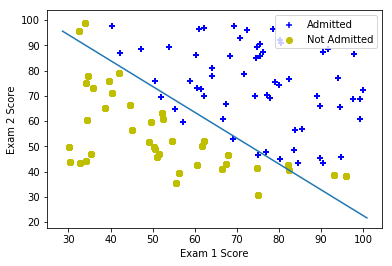

In [204]:
x1_adm=data[:,0][data[:,2]==1]
x2_adm=data[:,1][data[:,2]==1]
x1_fa=data[:,0][data[:,2]==0]
x2_fa=data[:,1][data[:,2]==0]
a=plt.scatter(x1_adm,x2_adm,c='b',marker='+')
b=plt.scatter(x1_fa,x2_fa,c='y',marker='o')
plt.xlabel('Exam 1 Score')
plt.ylabel('Exam 2 Score')
plt.legend((a,b),('Admitted','Not Admitted'),loc=1)
plot_x =np.linspace(min(data[:,1])-2,  max(data[:,1])+2);
plot_y = (-1/opt_theta[2])*(opt_theta[1]*plot_x + opt_theta[0])
plt.plot(plot_x,plot_y )
plt.show()

In [213]:
plt.close()
[min(data[:,1])-2,  max(data[:,1])+2]
opt_theta[2]

0.20147148529933262

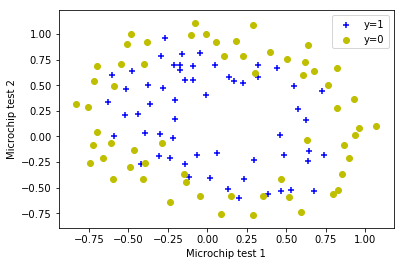

In [215]:
data=np.loadtxt("H://assignments//machine_learning//mex2//ex2data2.txt",delimiter=',')
x1_adm=data[:,0][data[:,2]==1]
x2_adm=data[:,1][data[:,2]==1]
x1_fa=data[:,0][data[:,2]==0]
x2_fa=data[:,1][data[:,2]==0]
a=plt.scatter(x1_adm,x2_adm,c='b',marker='+')
b=plt.scatter(x1_fa,x2_fa,c='y',marker='o')
plt.xlabel('Microchip test 1')
plt.ylabel('Microchip test 2')
plt.legend((a,b),('y=1','y=0'),loc=1)
plt.show()

In [225]:
# Note that this function inserts a column with 'ones' in the design matrix for the intercept.
poly = PolynomialFeatures(6)
XX = poly.fit_transform(data[:,0:2])
data[:,0:2].shape


(118, 2)

In [344]:
def cost_logi_reg(theta,X,y,lam):
#     print('1',theta.shape)
    theta = np.reshape(theta,(len(theta),1))
#     print('1',theta.shape)
    a=-np.dot(y.T,np.log(sigmoid(X.dot(theta))))
    b=-np.dot((1-y).T,np.log(1-sigmoid(X.dot(theta))))
    j=np.sum(a+b)/X.shape[0] + lam*np.sum(np.square(theta[1:]))/(2*X.shape[0])
    return j
def grad_logi_reg(theta,X,y,lam):
#     print('2',theta.shape)
    theta = np.reshape(theta,(len(theta),1))
#     print('2',theta.shape)
    grad=np.dot((sigmoid(X.dot(theta))-y).T,X).T/X.shape[0]+ (lam/X.shape[0])*np.r_[[[0]],theta[1:]]
#     print('2',grad.shape)
    return grad.flatten()

In [345]:
y=np.c_[data[:,2]]
lam=1
initial_theta=np.zeros((XX.shape[1], 1))
cost= cost_logi_reg(initial_theta, XX, y, lam)
grad= grad_logi_reg(initial_theta, XX, y, lam)
cost,grad[:5]

(0.69314718055994529,
 array([  8.47457627e-03,   1.87880932e-02,   7.77711864e-05,
          5.03446395e-02,   1.15013308e-02]))

In [346]:
test_theta = np.ones((XX.shape[1], 1))
lam=10
cost= cost_logi_reg(test_theta, XX, y, lam)
grad= grad_logi_reg(test_theta, XX, y, lam)
cost,grad[:5]

(3.1645093316150099,
 array([ 0.34604507,  0.16135192,  0.19479576,  0.22686278,  0.09218568]))

In [347]:
initial_theta=np.zeros((XX.shape[1]))
print(initial_theta.shape)
lam=1
Result = op.minimize(fun = cost_logi_reg,  x0 = initial_theta ,args = (XX, y,lam),method = 'TNC', jac = grad_logi_reg);
opt_theta=Result.x

(28,)


In [348]:
opt_theta

array([ 1.27271027,  0.62529965,  1.18111686, -2.019874  , -0.91743189,
       -1.4316693 ,  0.12393227, -0.36553119, -0.35725405, -0.17516292,
       -1.45817009, -0.05098417, -0.6155856 , -0.27469165, -1.19271299,
       -0.24217841, -0.20603303, -0.04466177, -0.27778947, -0.29539514,
       -0.45645982, -1.04319155,  0.02779373, -0.29244863,  0.01555758,
       -0.32742403, -0.14389149, -0.92467488])

In [349]:
plt.close('all')


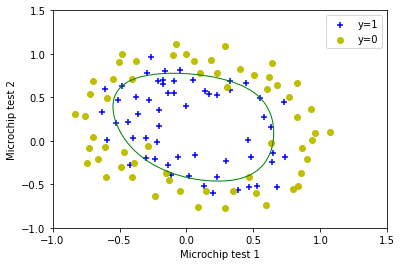

In [350]:
x1_adm=data[:,0][data[:,2]==1]
x2_adm=data[:,1][data[:,2]==1]
x1_fa=data[:,0][data[:,2]==0]
x2_fa=data[:,1][data[:,2]==0]
a=plt.scatter(x1_adm,x2_adm,c='b',marker='+')
b=plt.scatter(x1_fa,x2_fa,c='y',marker='o')
plt.xlabel('Microchip test 1')
plt.ylabel('Microchip test 2')
plt.legend((a,b),('y=1','y=0'),loc=1)
#for contour plot
u = np.linspace(-1, 1.5, 50);
v = np.linspace(-1, 1.5, 50);
z = np.zeros((len(u), len(v)));
#  Evaluate z = theta*x over the grid
# print( poly.fit_transform(np.c_[u[0],v[1]]).shape,np.c_[opt_theta].shape)
# print(z[0][0])
for i in range(0,len(u)):
    for j in range(0,len(v)):
        z[i][j] = np.dot(poly.fit_transform(np.c_[u[i],v[j]]),np.c_[opt_theta]);
z = z.T
# % Plot z = 0
# % Notice you need to specify the range [0, 0]
plt.contour(u, v, z,[0.5], linewidths=1, colors='g')  
plt.show()

In [384]:
#for contour plot
u = np.linspace(-1, 1.5, 50);
v = np.linspace(-1, 1.5, 50);
#  Evaluate z = theta*x over the grid
# print( poly.fit_transform(np.c_[u[0],v[1]]).shape,np.c_[opt_theta].shape)
# print(z[0][0])
li_z=[];
lam_arr=[1,0,100]
acc_li=[];
for km in range(3):
    z = np.zeros((len(u), len(v)));
    Result=op.minimize(fun = cost_logi_reg,  x0 = initial_theta ,args = (XX, y,lam_arr[km]),method = 'TNC', jac = grad_logi_reg)
    opt_theta=Result.x
    acuracy=100*sum(predict(opt_theta, XX) == y.ravel())/y.size 
    for i in range(0,len(u)):
        for j in range(0,len(v)):
            z[i][j] = np.dot(poly.fit_transform(np.c_[u[i],v[j]]),np.c_[opt_theta]);        
    z = z.T
    acc_li.append(acuracy)
    li_z.append(z)
# % Plot z = 0
# % Notice you need to specify the range [0, 0]
acc_li=np.array(acc_li)

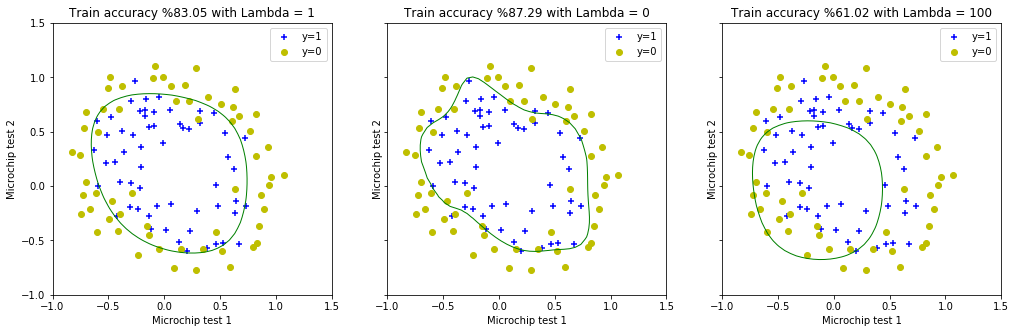

In [395]:
plt.close('all')
fig, axes = plt.subplots(1,3, sharey = True, figsize=(17,5))
x1_adm=data[:,0][data[:,2]==1]
x2_adm=data[:,1][data[:,2]==1]
x1_fa=data[:,0][data[:,2]==0]
x2_fa=data[:,1][data[:,2]==0]
for i in range(3):
    axes[i].scatter(x1_adm,x2_adm,c='b',marker='+')
    axes[i].scatter(x1_fa,x2_fa,c='y',marker='o')
    axes[i].set_xlabel('Microchip test 1')
    axes[i].set_ylabel('Microchip test 2')
    axes[i].legend((a,b),('y=1','y=0'),loc=1)
    axes.flatten()[i].contour(u, v, li_z[i],[0.0], linewidths=1, colors='g')  
    axes[i].set_title('Train accuracy %{} with Lambda = {}'.format(np.round(acc_li[i],2),lam_arr[i]))

plt.show()